In [53]:
import pandas as pd
import numpy as np

In [6]:
COLOR_01 = "#c44e52" # rgb(196,78,82)
COLOR_02 = "#4c72b0" # rgb(76,114,176)
COLOR_03 = "#231f20" # rgb(35, 31, 32)
COLOR_04 = "#b50c36" # rgb(181, 12, 54)
COLOR_05 = "#bdbcbc" # rgb(189, 188, 188)

In [7]:
df = pd.read_csv("./data.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                             53 non-null     object 
 1   After you arrived in France, which of the difficulties have you encountered?                                                                                                          53 non-null     object 
 2   What transport did you use from airport/train st

In [9]:
df.describe()

,Rate your first transfer experience:,Rate your overall experience with public transport in Paris at the beginning,Rate how hard was it to find food on campus (at your university) at the beginning,"If you had problems with finding accommodation, rate your experience:","If you had problems with accommodation quality, rate your experience:",Rate how hard was it to open your first bank account,"Rate your experience with shopping problems (problems with finding where to buy something, problems with access to shops, financial problems, etc.), if you had any at the beginning","If you had an experience with CAF procedure, please, rate it",Rate your familiarity with the sport facilities available on campus (at your university) and their tariffs,"Rate your onboarding experience in the university (the process where your accounts were made, your badge, email)"
count,53.000000,53.000000,53.000000,49.000000,48.000000,53.000000,53.000000,52.000000,53.000000,53.000000
mean,4.641509,4.075472,4.924528,4.285714,4.729167,4.150943,4.943396,3.038462,3.509434,5.000000
std,1.744159,1.567078,1.774272,2.581989,1.659782,1.974805,1.645683,1.857275,1.957458,1.664101
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.750000,2.000000,4.000000
50%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,2.000000,3.000000,5.000000
75%,6.000000,5.000000,6.000000,7.000000,6.000000,6.000000,6.000000,4.000000,5.000000,6.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [10]:
option01 = [
    "Transport (public transport system, tickets, Navigo etc.)",
    "Accommodation",
    "SIM card",
    "Bank",
    "University (administrative problems, courses, life etc.)",
    "French culture (language, mentality, social norms)",
    "Shopping (groceries, furniture, electronics)",
    "CAF",
    "Health (Insurances, doctor appointments)",
    "No problems",
    "other",
]

In [11]:
df.iloc[4,1]

'Transport (public transport system, tickets, Navigo etc.), Bank, French culture (language, mentality, social norms), CAF, Health (Insurances, doctor appointments)'

In [12]:
count01 = {}
for x in option01:
    count01[x] = 0

for sample in df.iloc[:, 1]:
    tmp = [option in sample for option in option01]
    if all(not x for x in tmp):
        count01["other"] += 1
    else:
        for i in range(len(tmp)):
            if tmp[i]:
                count01[option01[i]] += 1


In [13]:
count01

{'Transport (public transport system, tickets, Navigo etc.)': 22,
 'Accommodation': 21,
 'SIM card': 18,
 'Bank': 27,
 'University (administrative problems, courses, life etc.)': 16,
 'French culture (language, mentality, social norms)': 31,
 'Shopping (groceries, furniture, electronics)': 13,
 'CAF': 33,
 'Health (Insurances, doctor appointments)': 29,
 'No problems': 2,
 'other': 1}

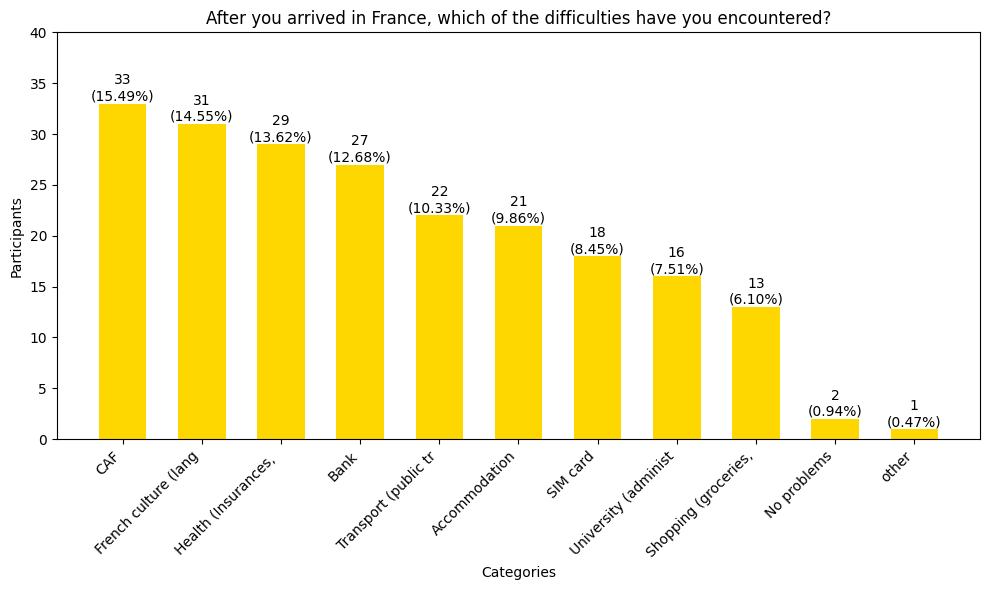

In [15]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count01

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [item[0][:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('After you arrived in France, which of the difficulties have you encountered?')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 40])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q01")
plt.show()



In [16]:
option02 = [
    "Airport Taxi",
    "RER (Metro)",
    "Bus",
    "Uber",
    "other",
]


In [17]:
count02 = {}
for x in option02:
    count02[x] = 0

for index, sample in enumerate(df.iloc[:, 2]):
    tmp = [option in str(sample) for option in option02]
    if all(not x for x in tmp):
        count02["other"] += 1
    else:
        for i in range(len(tmp)):
            if tmp[i]:
                count02[option02[i]] += 1


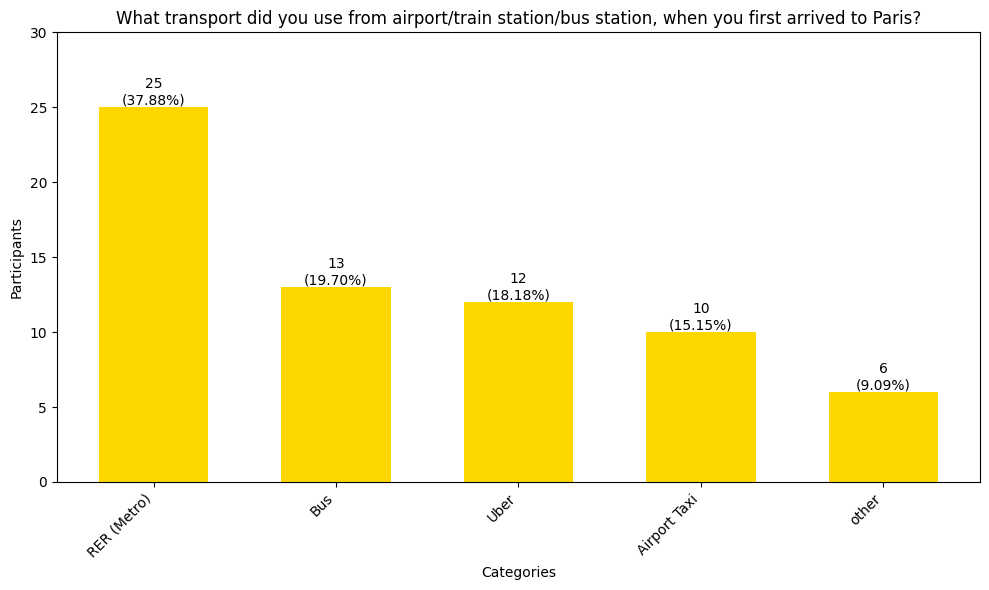

In [18]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count02

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [item[0][:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('What transport did you use from airport/train station/bus station, when you first arrived to Paris?')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 30])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q02")
plt.show()


In [54]:
option03 = list(range(1,8))
count03 = {}
for x in option03:
    count03[x] = 0

for index, sample in enumerate(df.iloc[:, 3]):
    count03[sample] += 1

In [55]:
count03

{1: 5, 2: 1, 3: 5, 4: 13, 5: 10, 6: 11, 7: 8}

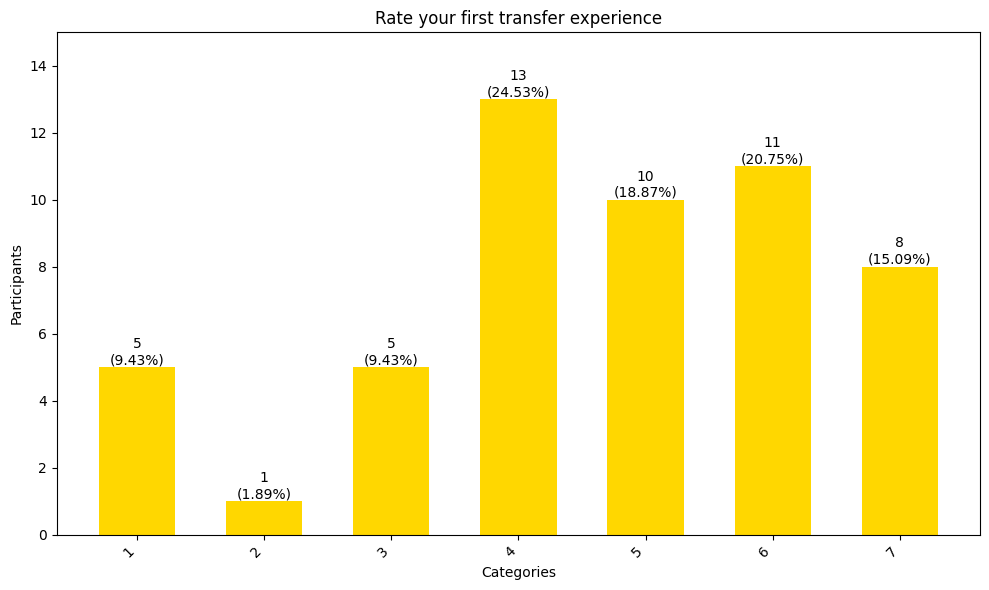

In [62]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count03

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate your first transfer experience')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 15])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')



# 计算平均数
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)


# 显示图形
plt.tight_layout()
plt.savefig("Q03")
plt.show()


In [22]:
option04 = [
    "Official RATP web-site",
    "Friends/classmates/other people",
    "My own way (by experience)",
    "Web application (IDF Mobilités)",
    "other",
]

count04 = {}
for x in option04:
    count04[x] = 0

for index, sample in enumerate(df.iloc[:, 4]):
    tmp = [option in str(sample) for option in option04]
    if all(not x for x in tmp):
        count04["other"] += 1
    else:
        for i in range(len(tmp)):
            if tmp[i]:
                count04[option04[i]] += 1



In [23]:
count04

{'Official RATP web-site': 7,
 'Friends/classmates/other people': 38,
 'My own way (by experience)': 22,
 'Web application (IDF Mobilités)': 15,
 'other': 41}

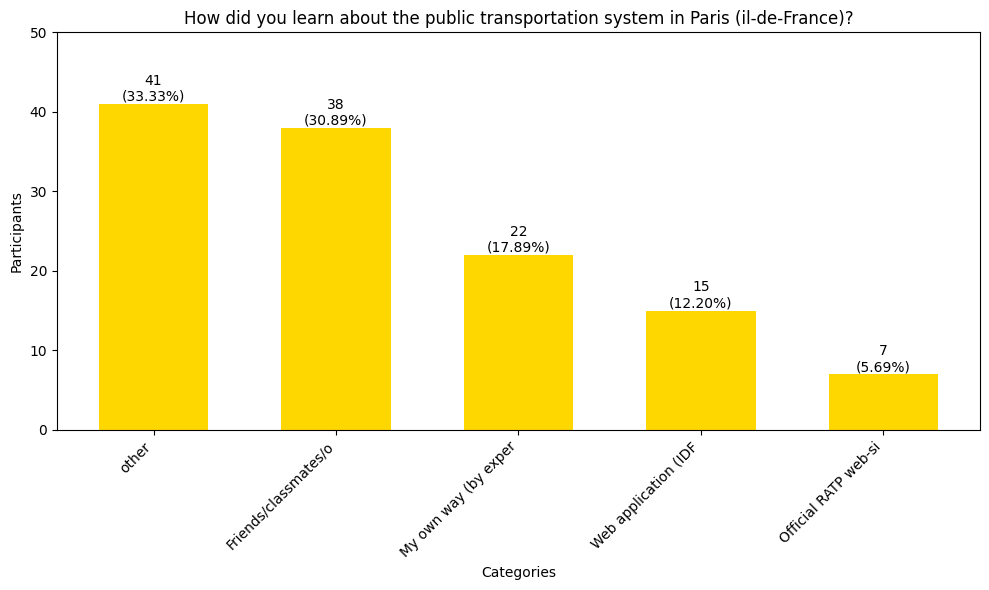

In [24]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count04

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [item[0][:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('How did you learn about the public transportation system in Paris (il-de-France)?')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 50])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q04")
plt.show()


In [25]:
option05 = list(range(1,8))
count05 = {}
for x in option05:
    count05[x] = 0

for index, sample in enumerate(df.iloc[:, 5]):
    count05[sample] += 1

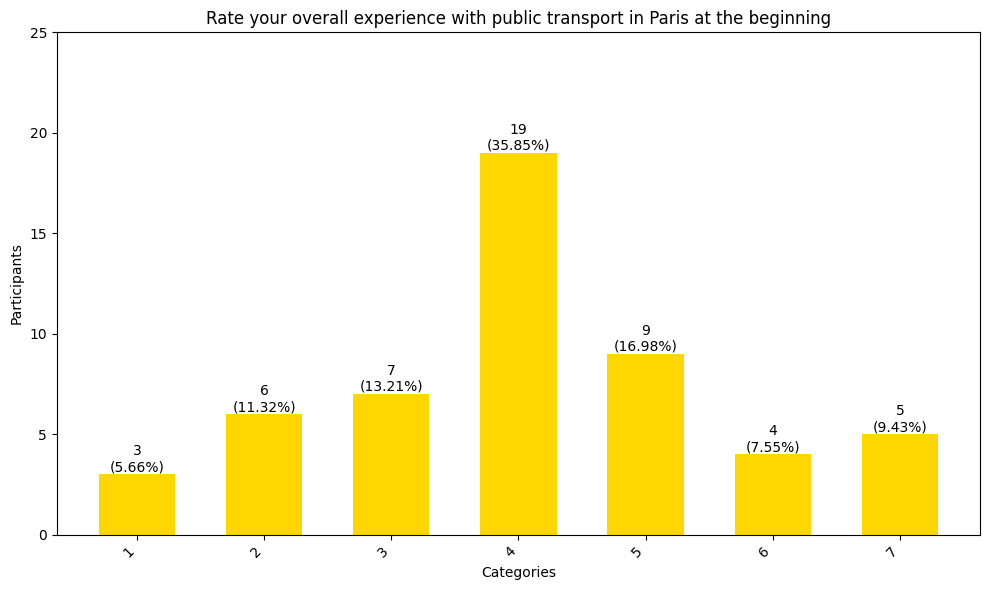

In [26]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count05

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate your overall experience with public transport in Paris at the beginning')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 25])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q05")
plt.show()


In [27]:
option06 = [
    "Crous",
    "WAN (Telecom Paris restaurant)",
    "Maniugn (Ecole Polytechnique restaurant)",
    "Telecom cafeteria",
    "Franprix",
    "Panific",
    "other",
]

count06 = {}
for x in option06:
    count06[x] = 0

for index, sample in enumerate(df.iloc[:, 6]):
    tmp = [option in str(sample) for option in option06]
    if all(not x for x in tmp):
        count06["other"] += 1
    else:
        for i in range(len(tmp)):
            if tmp[i]:
                count06[option06[i]] += 1



In [28]:
count06

{'Crous': 46,
 'WAN (Telecom Paris restaurant)': 31,
 'Maniugn (Ecole Polytechnique restaurant)': 16,
 'Telecom cafeteria': 23,
 'Franprix': 36,
 'Panific': 18,
 'other': 1}

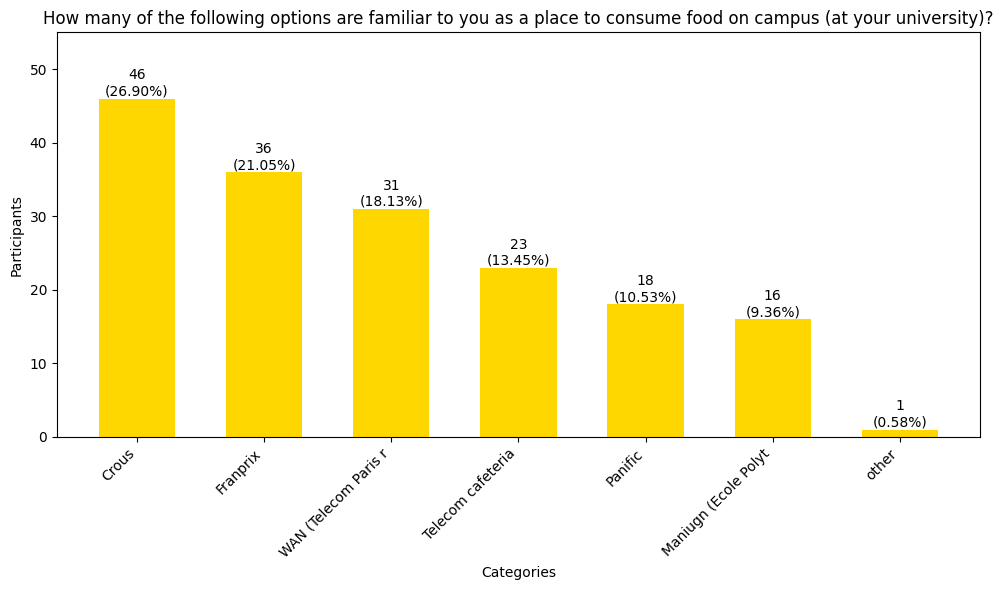

In [29]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count06

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('How many of the following options are familiar to you as a place to consume food on campus (at your university)?')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 55])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q06")
plt.show()


In [30]:
option07 = list(range(1,8))
count07 = {}
for x in option07:
    count07[x] = 0

for index, sample in enumerate(df.iloc[:, 7]):
    count07[sample] += 1

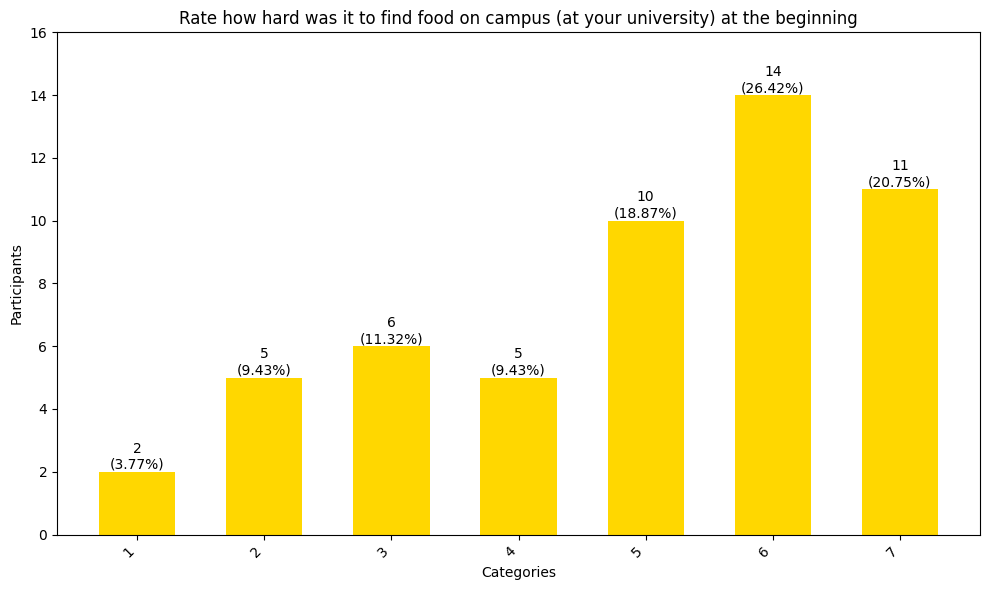

In [31]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count07

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate how hard was it to find food on campus (at your university) at the beginning')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 16])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q07")
plt.show()


In [32]:
option08 = list(range(1,8))
count08 = {}
for x in option08:
    count08[x] = 0
count08["other"] = 0

for index, sample in enumerate(df.iloc[:, 8]):
    if sample not in option08:
        count08["other"] += 1
    else:
        count08[sample] += 1

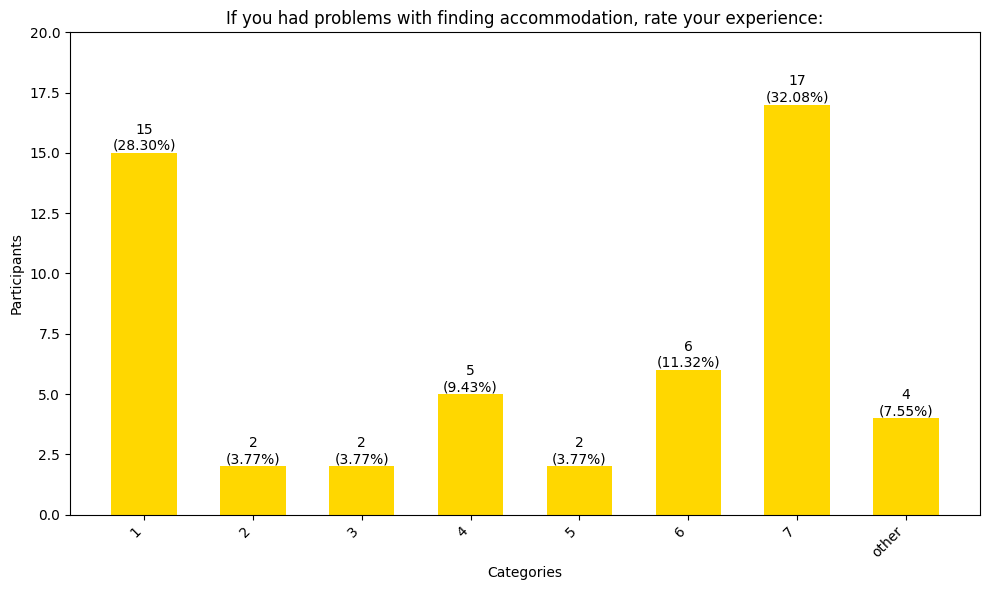

In [33]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count08

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('If you had problems with finding accommodation, rate your experience:')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 20])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q08")
plt.show()


In [34]:
option09 = list(range(1,8))
count09 = {}
for x in option09:
    count09[x] = 0
count09["other"] = 0

for index, sample in enumerate(df.iloc[:, 9]):
    if sample not in option09:
        count09["other"] += 1
    else:
        count09[sample] += 1

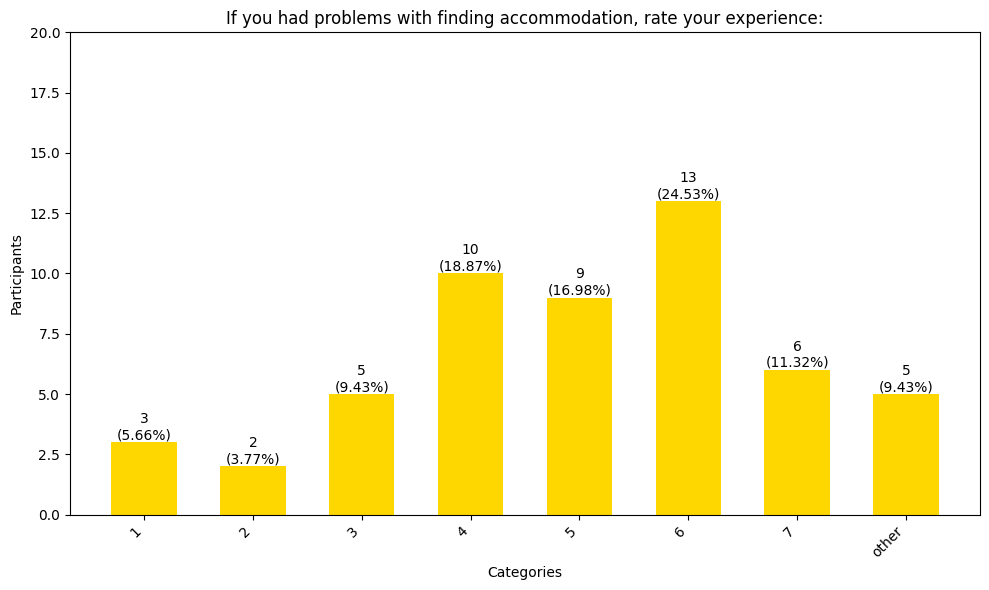

In [35]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count09

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('If you had problems with finding accommodation, rate your experience:')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 20])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q09")
plt.show()


In [36]:
option10 = [
    "Choosing/Finding",
    "Setting up",
    "Further using",
    "No problems",
    "other",
]

count10 = {}
for x in option10:
    count10[x] = 0

for index, sample in enumerate(df.iloc[:, 10]):
    tmp = [option in str(sample) for option in option10]
    if all(not x for x in tmp):
        count10["other"] += 1
    else:
        for i in range(len(tmp)):
            if tmp[i]:
                count10[option10[i]] += 1



In [37]:
count10

{'Choosing/Finding': 21,
 'Setting up': 9,
 'Further using': 10,
 'No problems': 24,
 'other': 4}

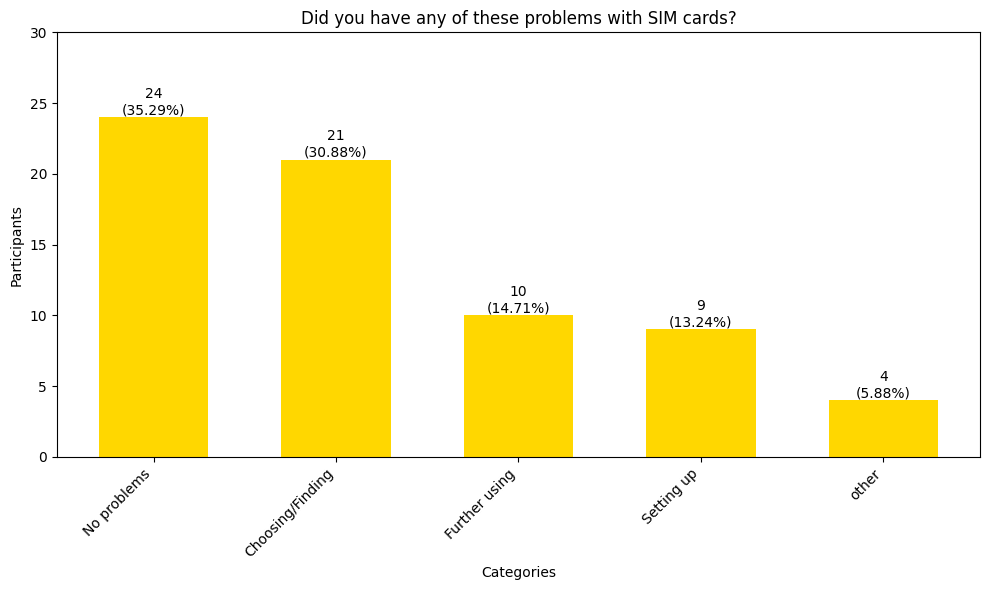

In [38]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count10

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Did you have any of these problems with SIM cards?')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 30])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q10")
plt.show()


In [39]:
option11 = list(range(1,8))
count11 = {}
for x in option11:
    count11[x] = 0
count11["other"] = 0

for index, sample in enumerate(df.iloc[:, 11]):
    if sample not in option11:
        count11["other"] += 1
    else:
        count11[sample] += 1

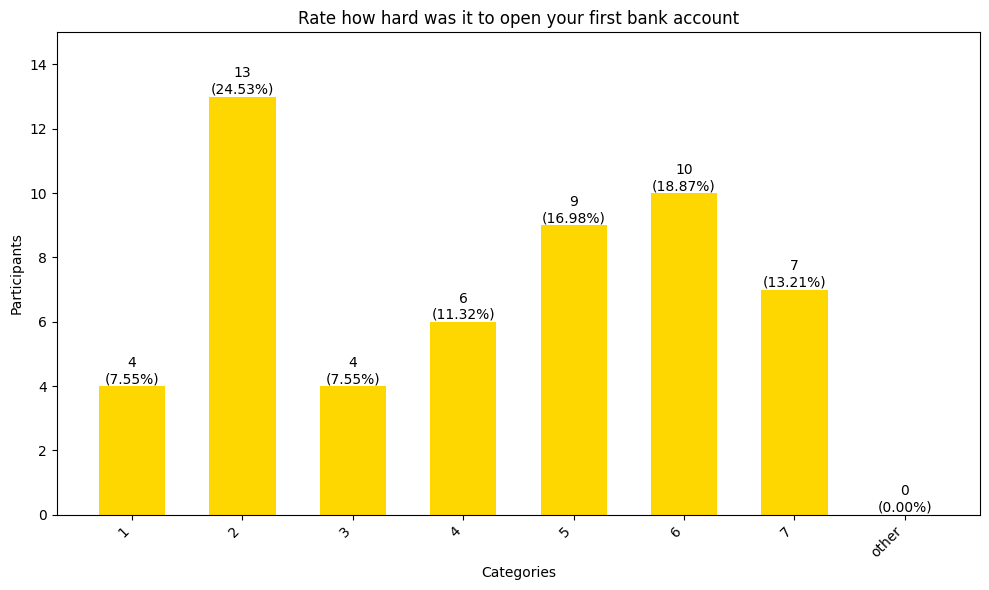

In [40]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count11

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate how hard was it to open your first bank account')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 15])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q11")
plt.show()


In [41]:
option12 = [
    "Groceries",
    "Kitchen utilities",
    "Electronics",
    "Furniture",
    "Stationaries",
    "other",
]

count12 = {}
for x in option12:
    count12[x] = 0

for index, sample in enumerate(df.iloc[:, 12]):
    tmp = [option in str(sample) for option in option12]
    if all(not x for x in tmp):
        count12["other"] += 1
    else:
        for i in range(len(tmp)):
            if tmp[i]:
                count12[option12[i]] += 1



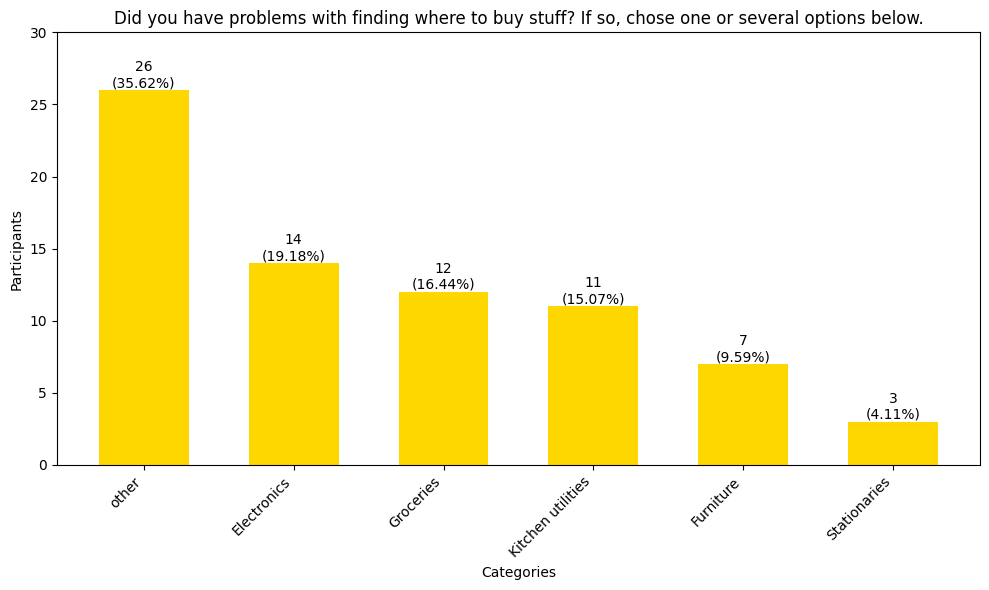

In [42]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count12

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

# sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Did you have problems with finding where to buy stuff? If so, chose one or several options below.')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 30])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q12")
plt.show()


In [43]:
option13 = list(range(1,8))
count13 = {}
for x in option13:
    count13[x] = 0
count13["other"] = 0

for index, sample in enumerate(df.iloc[:, 13]):
    if sample not in option13:
        count13["other"] += 1
    else:
        count13[sample] += 1


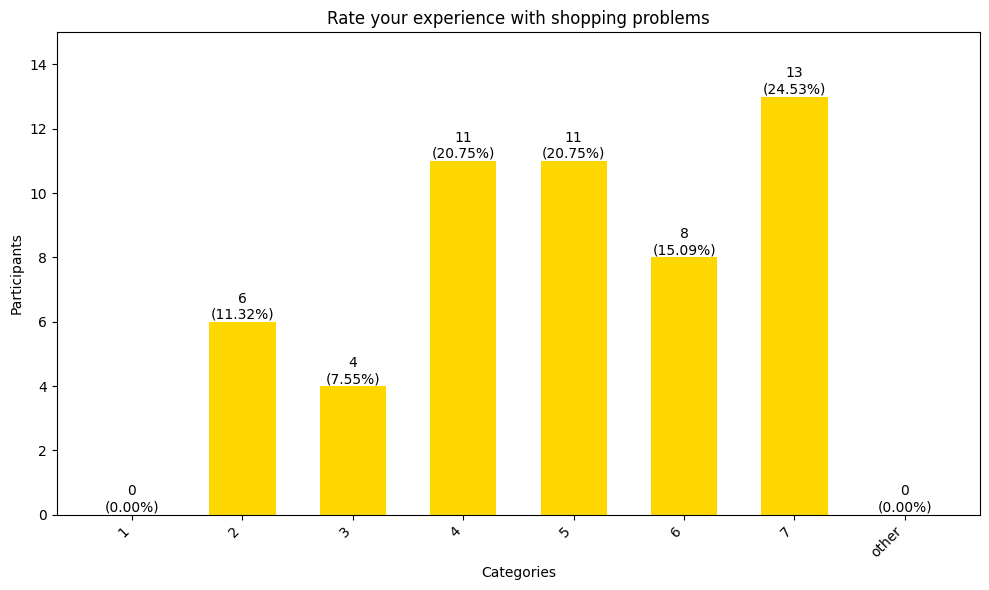

In [44]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count13

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate your experience with shopping problems')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 15])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q13")
plt.show()


In [45]:
option14 = list(range(1,8))
count14 = {}
for x in option14:
    count14[x] = 0
count14["other"] = 0

for index, sample in enumerate(df.iloc[:, 14]):
    if sample not in option14:
        count14["other"] += 1
    else:
        count14[sample] += 1


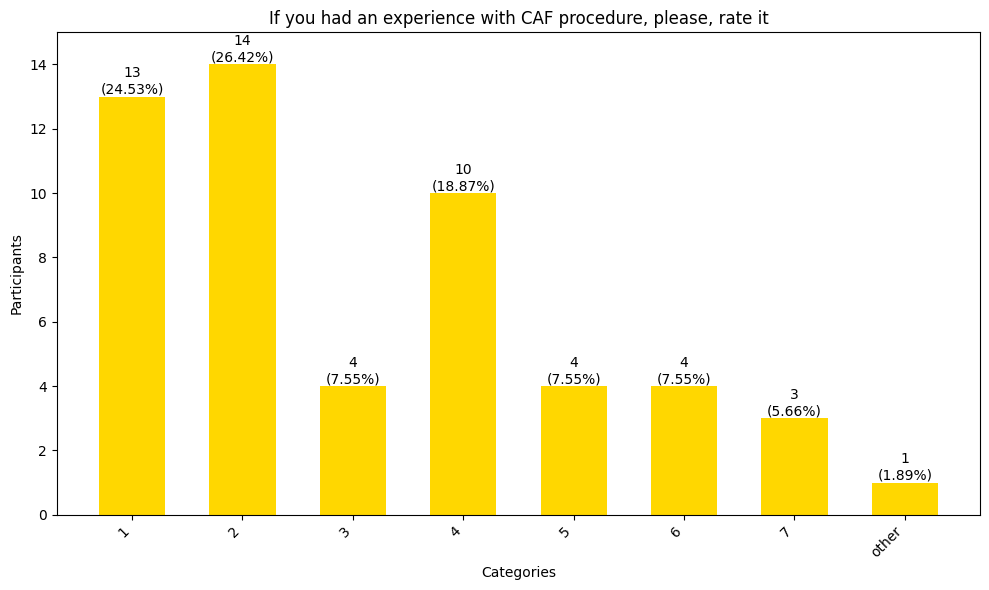

In [46]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count14

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('If you had an experience with CAF procedure, please, rate it')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 15])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q14")
plt.show()


In [47]:
option15 = list(range(1,8))
count15 = {}
for x in option15:
    count15[x] = 0
count15["other"] = 0

for index, sample in enumerate(df.iloc[:, 15]):
    if sample not in option15:
        count15["other"] += 1
    else:
        count15[sample] += 1


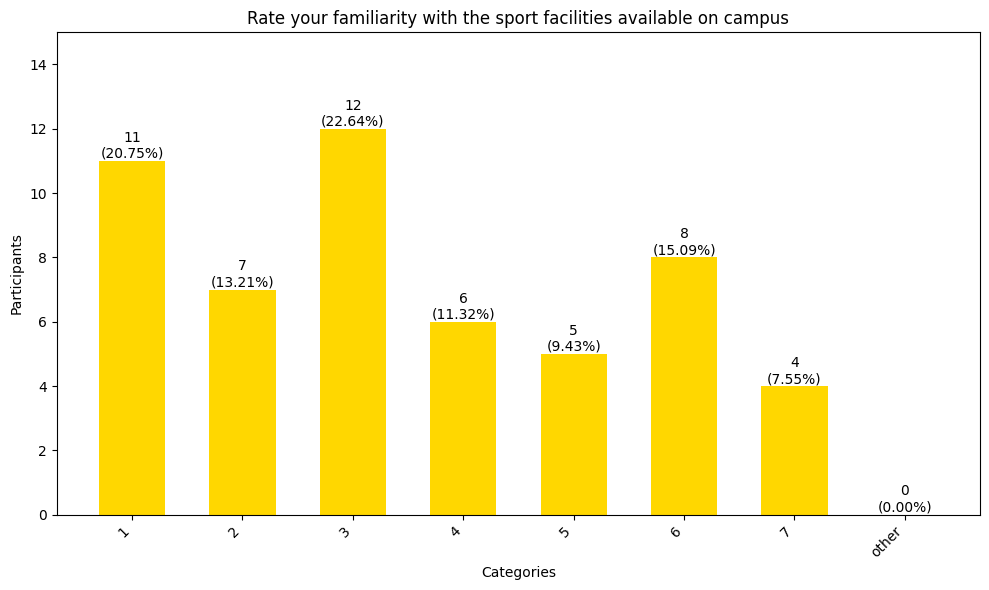

In [48]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count15

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate your familiarity with the sport facilities available on campus')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 15])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q15")
plt.show()


In [49]:
option16 = list(range(1,8))
count16 = {}
for x in option16:
    count16[x] = 0
count16["other"] = 0

for index, sample in enumerate(df.iloc[:, 16]):
    if sample not in option16:
        count16["other"] += 1
    else:
        count16[sample] += 1


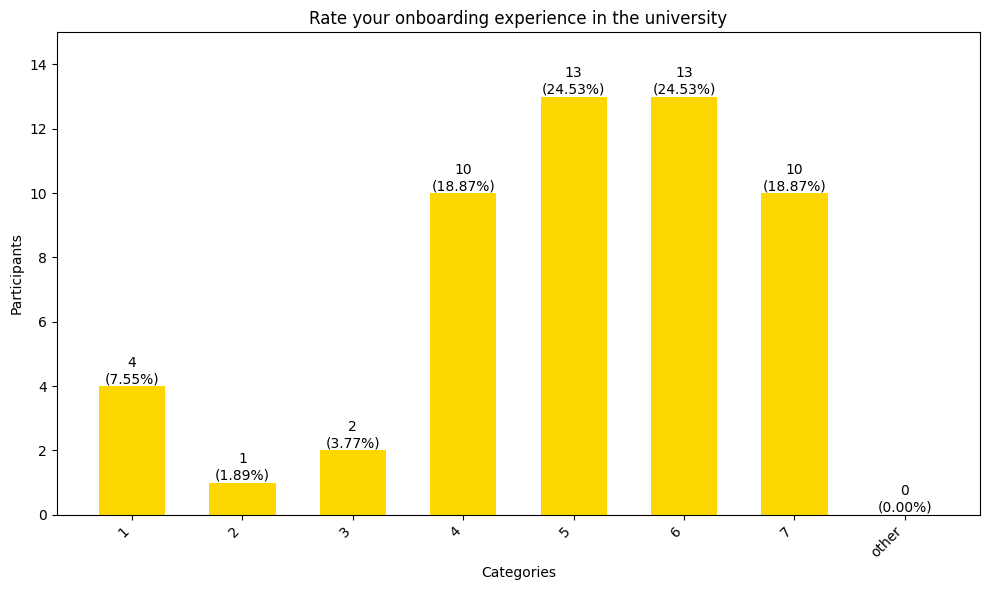

In [50]:
import matplotlib.pyplot as plt

# 给定的字典数据
data = count16

sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)

sorted_data = list(data.items())

# 提取键和值
values = [item[1] for item in sorted_data]
# 截取名称长度为定值
max_length = 20  # 设置名称的最大长度
categories = [str(item[0])[:max_length]  for item in sorted_data]  # 对名称进行截取

# 创建直方图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color="gold", width=0.6)

# 添加标题和标签
plt.title('Rate your onboarding experience in the university')
plt.xlabel('Categories')
plt.ylabel('Participants')

plt.ylim([0, 15])
# 旋转x轴标签，以便更好地显示
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐

# 添加数量和百分比标注
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height}\n({height / sum(values) * 100:.2f}%)',
             ha='center', va='bottom')

# 显示图形
plt.tight_layout()
plt.savefig("Q16")
plt.show()


In [51]:
count16

{1: 4, 2: 1, 3: 2, 4: 10, 5: 13, 6: 13, 7: 10, 'other': 0}

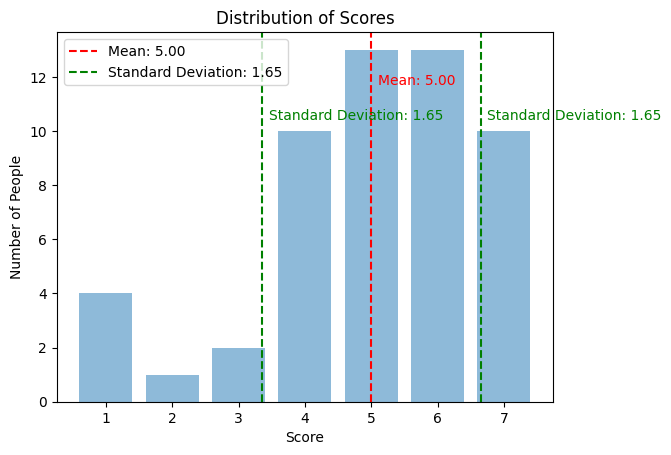

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
data = {1: 4, 2: 1, 3: 2, 4: 10, 5: 13, 6: 13, 7: 10, 'other': 0}

# 计算平均数
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)

# 绘图
scores = [score for score in data.keys() if isinstance(score, int)]
counts = [count for score, count in data.items() if isinstance(score, int)]

plt.bar(scores, counts, align='center', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Number of People')
plt.title('Distribution of Scores')

# 标记平均数和标准差
plt.axvline(x=mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.text(mean + 0.1, max(counts) * 0.9, f'Mean: {mean:.2f}', color='red')
plt.axvline(x=mean + std_dev, color='g', linestyle='--', label=f'Standard Deviation: {std_dev:.2f}')
plt.text(mean + std_dev + 0.1, max(counts) * 0.8, f'Standard Deviation: {std_dev:.2f}', color='green')
plt.axvline(x=mean - std_dev, color='g', linestyle='--')
plt.text(mean - std_dev + 0.1, max(counts) * 0.8, f'Standard Deviation: {std_dev:.2f}', color='green')

plt.xticks(scores)
plt.legend()
plt.show()


In [67]:
count05

{1: 3, 2: 6, 3: 7, 4: 19, 5: 9, 6: 4, 7: 5}

In [68]:
count07

{1: 2, 2: 5, 3: 6, 4: 5, 5: 10, 6: 14, 7: 11}

In [69]:
count11

{1: 4, 2: 13, 3: 4, 4: 6, 5: 9, 6: 10, 7: 7, 'other': 0}

In [70]:
count13

{1: 0, 2: 6, 3: 4, 4: 11, 5: 11, 6: 8, 7: 13, 'other': 0}

In [71]:
count15

{1: 11, 2: 7, 3: 12, 4: 6, 5: 5, 6: 8, 7: 4, 'other': 0}

In [72]:
count16

{1: 4, 2: 1, 3: 2, 4: 10, 5: 13, 6: 13, 7: 10, 'other': 0}

In [75]:
# 计算平均数
data = count05
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)

print(mean, std_dev)

4.0754716981132075 1.5522236831096703


In [76]:
# 计算平均数
data = count07
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)

print(mean, std_dev)

4.9245283018867925 1.7574537391992482


In [77]:
# 计算平均数
data = count11
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)

print(mean, std_dev)


4.150943396226415 1.9560860653123677


In [79]:
# 计算平均数
data = count13
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)

print(mean, std_dev)


4.943396226415095 1.6300838540720888


In [78]:
# 计算平均数
data = count15
total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
total_counts = sum(count for score, count in data.items() if isinstance(score, int))
mean = total_scores / total_counts

# 计算标准差
squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
std_dev = np.sqrt(squared_diff_sum / total_counts)

print(mean, std_dev)


3.509433962264151 1.9389030307419062


In [87]:
def ms(data):
    # 计算平均数
    total_scores = sum(score * count for score, count in data.items() if isinstance(score, int))
    total_counts = sum(count for score, count in data.items() if isinstance(score, int))
    mean = total_scores / (total_counts-1)

    # 计算标准差
    squared_diff_sum = sum(count * (score - mean) ** 2 for score, count in data.items() if isinstance(score, int))
    std_dev = np.sqrt(squared_diff_sum / (total_counts -1))
    return mean, std_dev


In [90]:
ca = ["public transfer", "campus food", "bank", "shopping", "sport",  "university"]

means = np.array([
    ms(count05)[0],
    ms(count07)[0],
    ms(count11)[0],
    ms(count13)[0],
    ms(count15)[0],
    ms(count16)[0],
])

stds  = np.array([
    ms(count05)[1],
    ms(count07)[1],
    ms(count11)[1],
    ms(count13)[1],
    ms(count15)[1],
    ms(count16)[1],
])

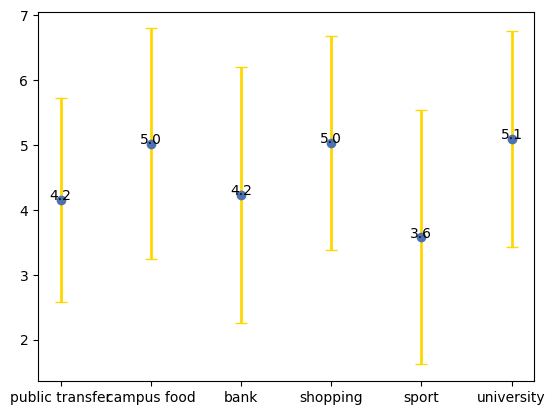

In [131]:
plt.errorbar(ca, means, stds, fmt='o',ecolor="gold",color=COLOR_02,elinewidth=2,capsize=4,)

for x, y, y_err in zip(ca, means, stds):
    plt.text(x, y, f'{y:.1f}', ha='center')

Text(0.5, 1.0, 'Average score for different issues')

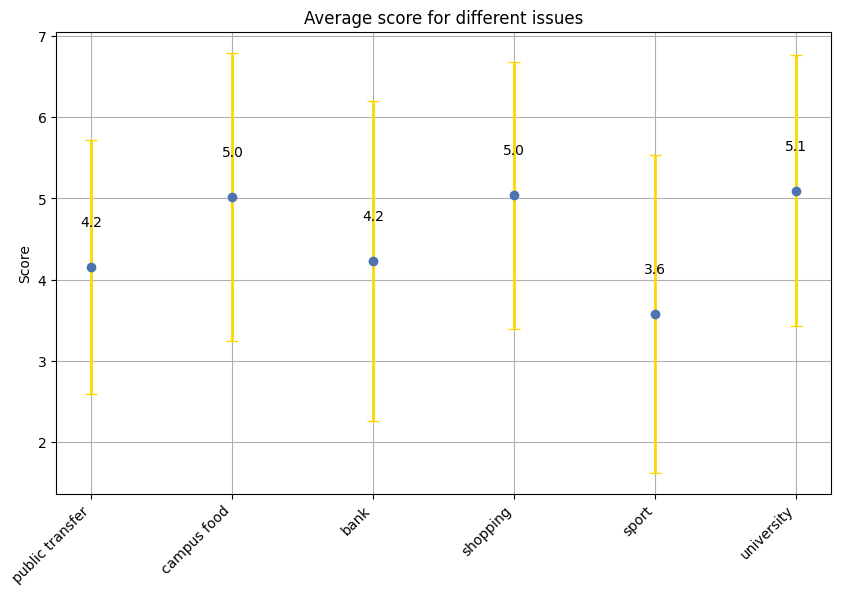

In [135]:
# plt.scatter(ca, means, c=COLOR_04)
# plt.scatter(ca, means + stds, c=COLOR_05)
# plt.scatter(ca, means - stds, c=COLOR_05)
plt.figure(figsize=(10, 6))
plt.errorbar(ca, means, stds, fmt='o',ecolor="gold",color=COLOR_02,elinewidth=2,capsize=4)
plt.grid()
plt.xticks(rotation=45, ha='right')  # 45度角旋转，并向右对齐
for x, y, y_err in zip(ca, means, stds):
    plt.text(x, y + 0.5, f'{y:.1f}', ha='center')
plt.ylabel("Score")

plt.title("Average score for different issues")



In [98]:
ms(count14)

(3.0980392156862746, 1.8582494972920747)